In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://Deep_learning//ResNetIC50_log//Dataset//ODC-11K"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario5_ODC-11K

dataset = np.load(workdir + "//ODC11K_dataset.npz") # input file
ss0 = np.load(workdir + '//ODC11K_dataset_r0.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 44


In [6]:
x.shape

(11385, 19331)

In [7]:
training_image_array.shape

(10247, 19331)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10247, 19331) (10247,) (1138, 19331) (1138,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10247, 19331)
10247 train samples
1138 test samples


In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [15]:
import matplotlib
from matplotlib import pyplot as plt

In [16]:
y_lin

array([1.96536451, 1.97188658, 1.87188929, ..., 1.9588185 , 1.94872661,
       1.91175183])

In [17]:
import pickle
import joblib
workdir = "D://Deep_learning//ResNetIC50_log//Result//ODC-11K//SVR"
joblib.dump(svr_lin, workdir + '//ODC11K_SVR_model.pkl') 


['D://Deep_learning//ResNetIC50_log//Result//ODC-11K//SVR//ODC11K_SVR_model.pkl']

In [18]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//ODC11K_SVR_pred_obs_table.csv')

In [20]:
c

,Predicted,Test
0,1.965365,2.079442
1,1.971887,2.079442
2,1.871889,-3.747924
3,1.973701,2.079442
4,1.908868,-0.114399
...,...,...
1133,1.987524,2.079442
1134,1.932111,2.079442
1135,1.958819,-2.327235
1136,1.948727,2.079442


In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.023001267932246605, intercept=1.9071271189605774, rvalue=0.6657933350829262, pvalue=1.179545379812776e-146, stderr=0.0007647883808364613)

In [22]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.22016806626565444


In [23]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.0604252643352066


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


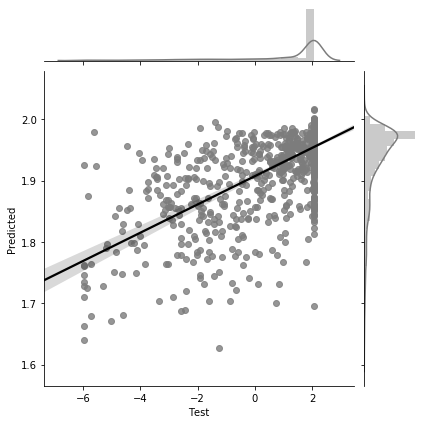

In [24]:
workdir = "D://Deep_learning//ResNetIC50_log//Figure//Backbone//ODC-11K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//ODC11K_SVR.png', dpi=300)